## Biases in global FATES runs in various reduced complexity modes

#### Load libraries

In [4]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import cartopy.crs as ccrs
import functions_py.fates_xarray_functions as fa

#### Various plotting options

In [5]:
min_lat_plotting = -90
max_lat_plotting = 90
min_lon_plotting = -180
max_lon_plotting = 180
geog_range_plotting = [min_lon_plotting, max_lon_plotting, min_lat_plotting, max_lat_plotting]

pfts = ['broadleaf_evergreen_tropical_tree','needleleaf_evergreen_extratrop_tree',
         'needleleaf_colddecid_extratrop_tree','broadleaf_evergreen_extratrop_tree',
        'broadleaf_hydrodecid_tropical_tree','broadleaf_colddecid_extratrop_tree',
        'broadleaf_evergreen_extratrop_shrub','broadleaf_hydrodecid_extratrop_shrub',
        'broadleaf_colddecid_extratrop_shrub', 'arctic_c3_grass',
        'cool_c3_grasss','c4_grass']


#### About these runs: 

- Resolution was a 4x5 grid (f45_f45). 
- Compset was 2000_DATM%QIA_ELM%BGC-FATES_SICE_SOCN_SROF_SGLC_SWAV (IELMFATES without mosart).
- Full fates has spitfire mode 1 (constant lightning).
- These runs do not include any land use. 
- I ran each mode for 200 years and used the last 20 for the ILAMB comparisons and the last five for the plots here. For spmode I only ran for 30 years since we're not starting from bare ground, but this probably needs to be longer for the water  cycle  to spin up. 
- FATES commit 08d429d

In [9]:
# Satellite Phenology mode
fates_history_file_sp = '/compyfs/need138/elm_runs/spmode_JH_params.Eaf1f7c2-F08d429d.2022-09-02/run/lnd/hist/spmode_JH_params.Eaf1f7c2-F08d429d.2022-09-02.elm.h0.fullrun.nc'
fates_history_fin_sp = xr.open_dataset(fates_history_file_sp,  decode_times=False)
nscls_bins = len(fates_history_fin_sp.variables['fates_levscls'])
npfts = len(fates_history_fin_sp.variables['fates_levpft'])
nage_bins = len(fates_history_fin_sp.variables['fates_levage'])
### use the last 5 years
nyears = int(len(fates_history_fin_sp.variables['time'])/12)
tave_start_sp = (nyears-5)*12
tave_stop_sp  = nyears*12

# Fixed biogeography no comp
fates_history_file_fbnc = '/compyfs/need138/elm_runs/fixed_biog_nocomp_JH_params.Eaf1f7c2-F08d429d.2022-09-02/run/lnd/hist/fixed_biog_nocomp_JH_params.Eaf1f7c2-F08d429d.2022-09-02.elm.h0.fullrun.nc'
fates_history_fin_fbnc = xr.open_dataset(fates_history_file_fbnc,  decode_times=False)
nyears_fbnc = int(len(fates_history_fin_fbnc.variables['time'])/12)
tave_start_fbnc = (nyears_fbnc-5)*12
tave_stop_fbnc = nyears_fbnc*12

# Fixed biogeography comp
fates_history_file_fbc = '/compyfs/need138/elm_runs/fixed_biog_comp_JH_params.Eaf1f7c2-F08d429d.2022-09-04/run/lnd/hist/fixed_biog_comp_JH_params.Eaf1f7c2-F08d429d.2022-09-04.elm.h0.fullrun.nc'
fates_history_fin_fbc = xr.open_dataset(fates_history_file_fbc,  decode_times=False)
nyears_fbc = int(len(fates_history_fin_fbc.variables['time'])/12)
tave_start_fbc = (nyears_fbc-5)*12
tave_stop_fbc = nyears_fbc*12

# Full FATES 
fates_history_file_full = '/compyfs/need138/elm_runs/full_fates_JH_spitfire.Eaf1f7c2-F12ce31c.2022-09-12/run/lnd/hist/full_fates_JH_spitfire.Eaf1f7c2-F12ce31c.2022-09-12.elm.h0.fullrun.nc'
fates_history_fin_full = xr.open_dataset(fates_history_file_full,  decode_times=False)
nyears_full = int(len(fates_history_fin_full.variables['time'])/12)
tave_start_full = (nyears_full-5)*12
tave_stop_full = nyears_full*12

## GPP 

### Total GPP
See ILAMB for comparisons with data:
https://compy-dtn.pnl.gov/need138/rcmodes_default_JH_params/EcosystemandCarbonCycle/GrossPrimaryProductivity/FLUXCOM/FLUXCOM.html

#### Notes:
- Spmode: high bias in SW amazon, NZ and Australia. Low bias in E. US, Europe, E. Amazon, Central Africa, India and SE Asia. 

- Fixed biogeography no comp: high bias in small region of SE Amazon. Low bias in central America, Africa, India, SE Asia, PNW. 

- Fixed biogeography comp: high bias across most of the globe with the exception of India, N. Africa. 

- Full: high bias in most of the globe with the exception of India and N. Africa. 




### GPP by PFT

#### Notes: 
- SP mode looks good
- Fixed biogeography no comp is similar to SP mode but with c3 grasses more abundant across much of the globe. 
- Fixed biogeography comp: needleleaf evergreen extratropical trees start to take over across the globe. Too many broadleaf hydrodeciduous tropical trees in the Amazon. 
- Full: broadleaf evergreen extratropical trees and broadleaf hydrodeciduous tropical trees dominate the tropics and temperate zone. Broadleaf evergreen extratropical shrubs dominate the boreal zone. 

''

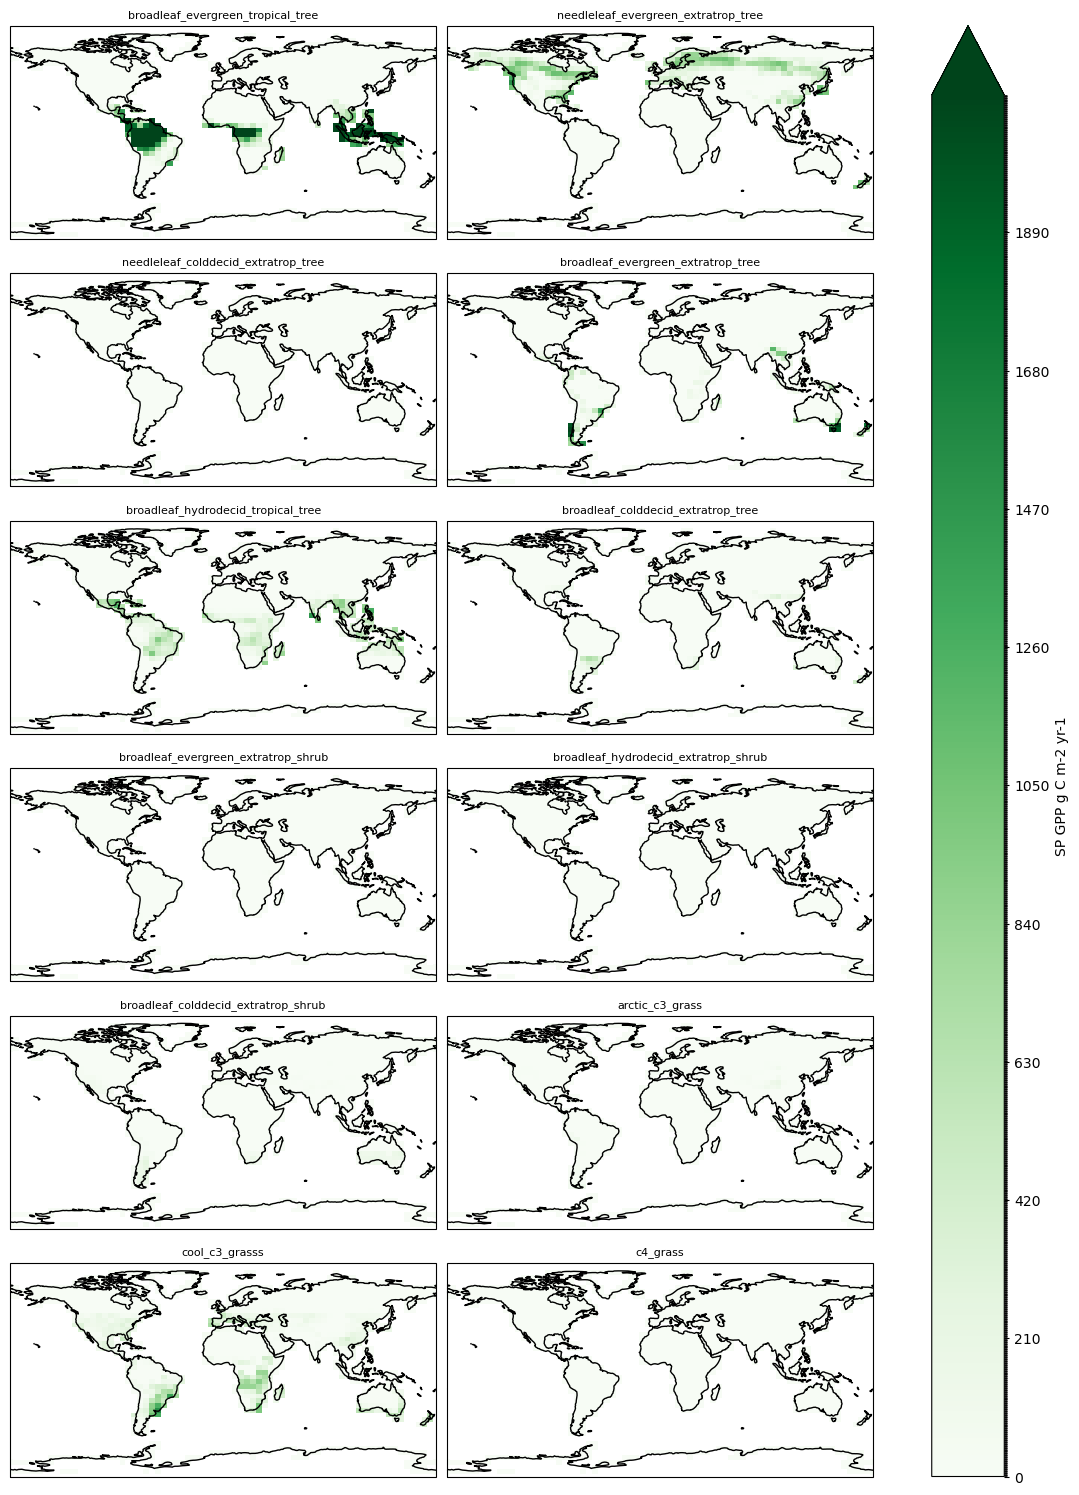

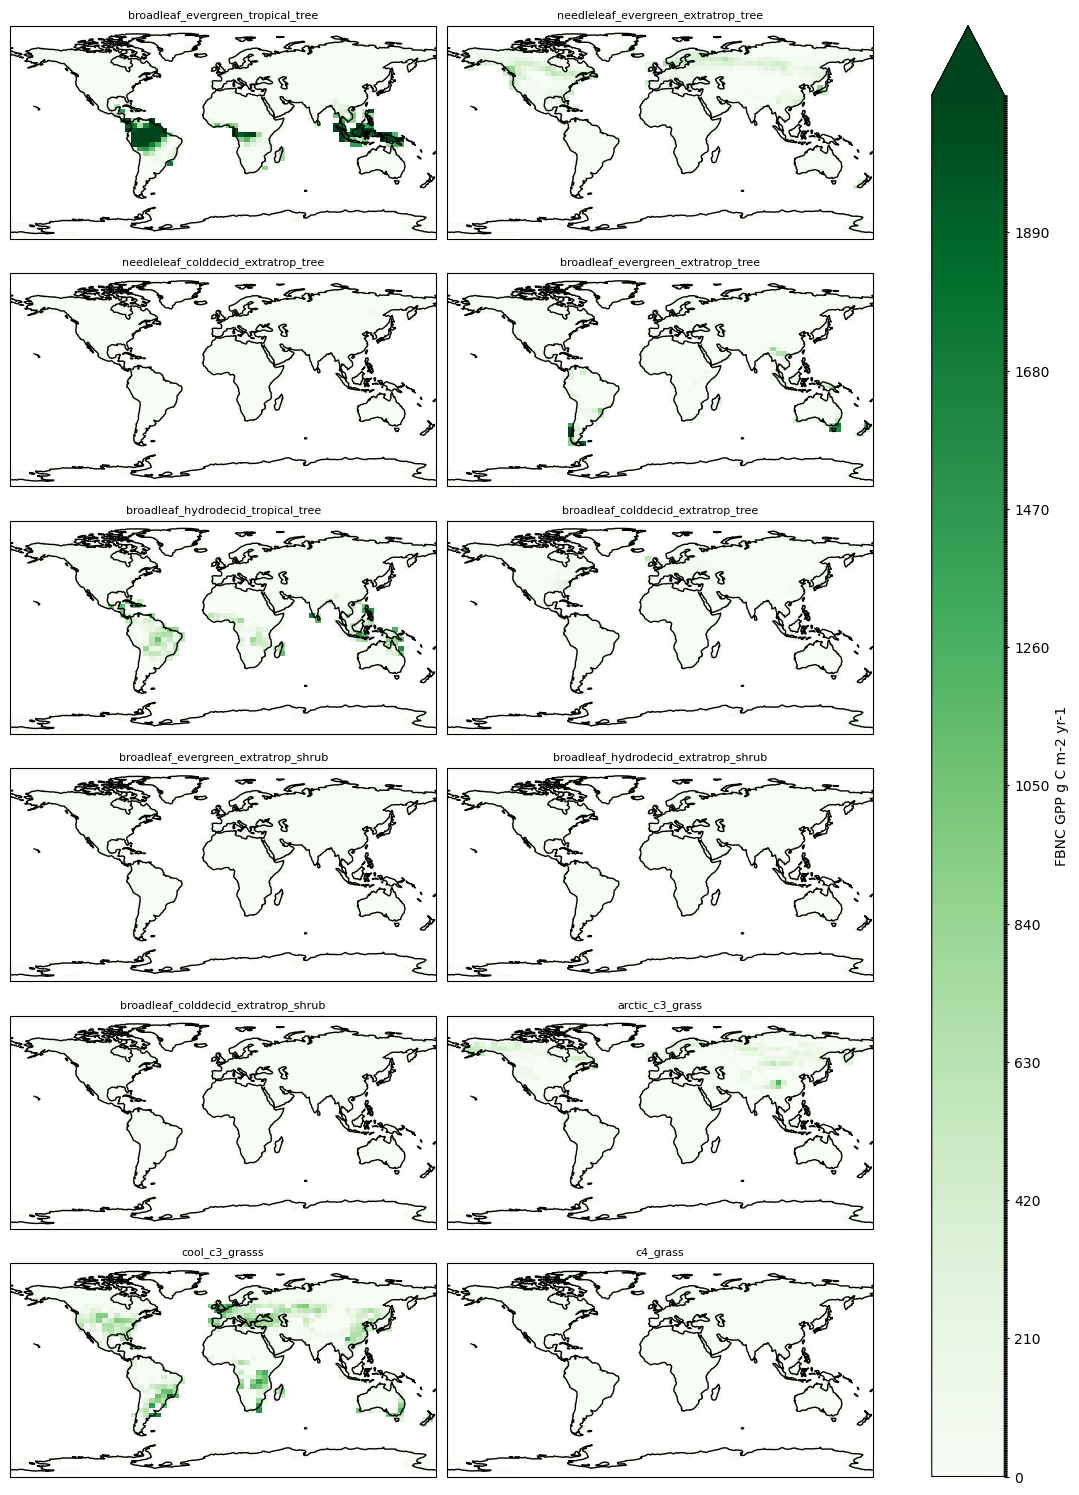

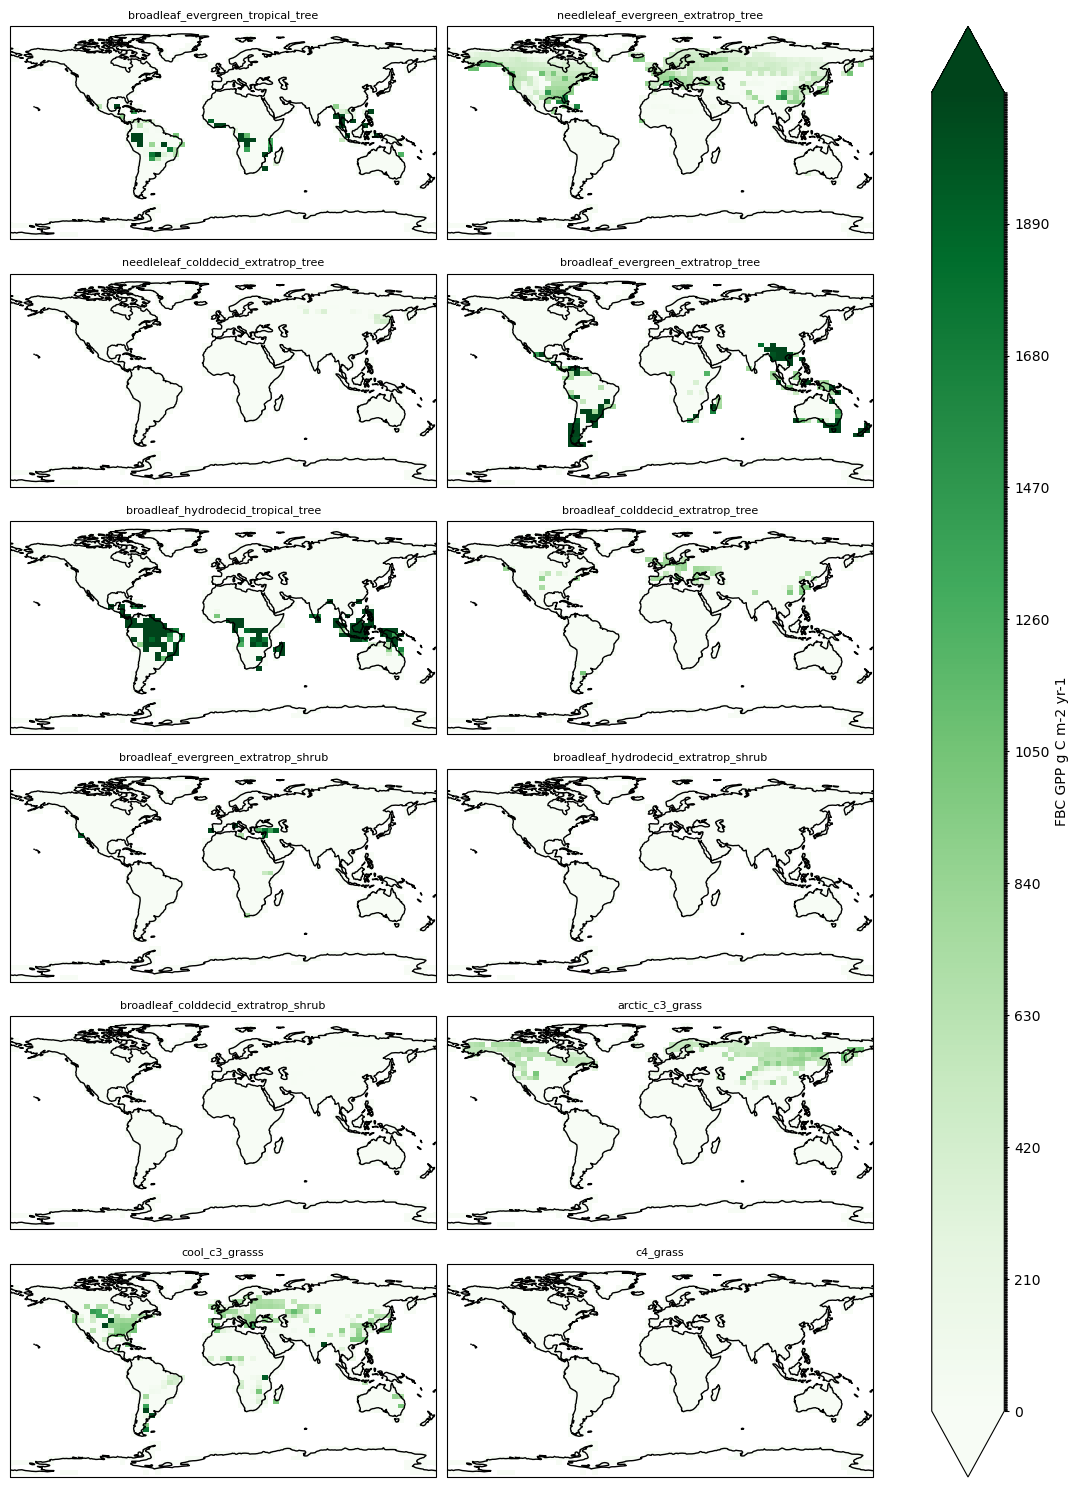

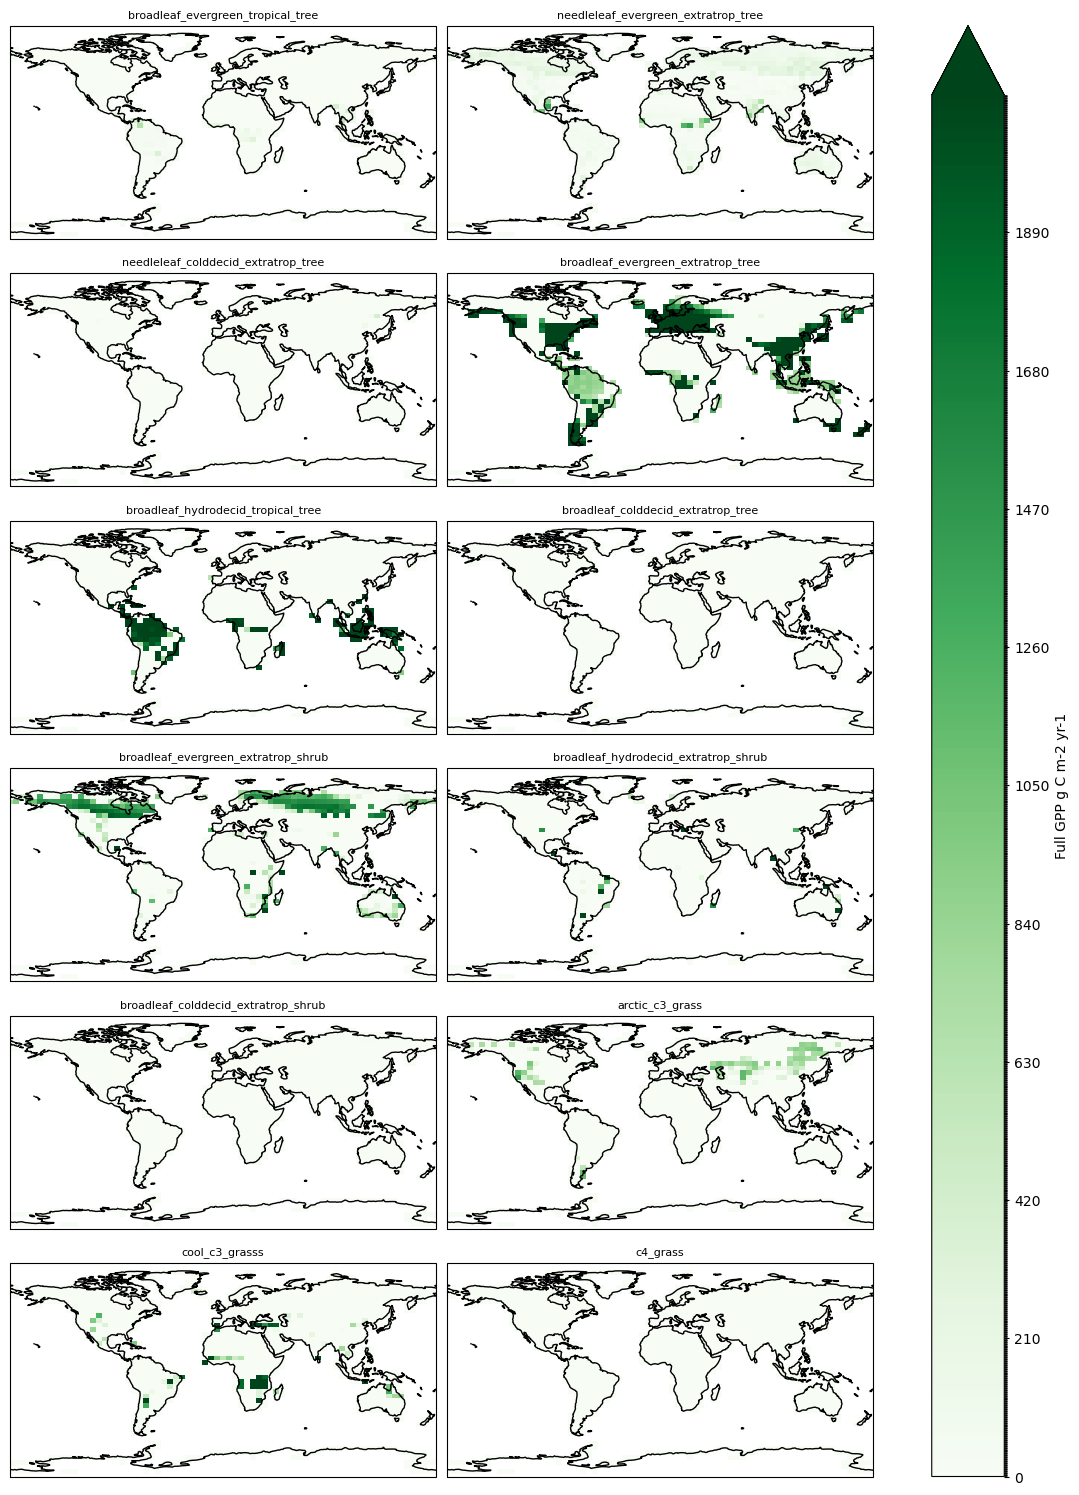

In [22]:
sp = fates_history_fin_sp.FATES_GPP_PF.isel(time=slice(tave_start_sp,tave_stop_sp)).mean(dim='time') * 86400. * 365. * 1.0e3 
g = sp.plot(x="lon",y="lat",col="fates_levpft", col_wrap=2, 
           figsize=(12, 15),
      cbar_kwargs={"label": "SP GPP g C m-2 yr-1"},
      subplot_kws={"projection":ccrs.PlateCarree(),"facecolor":"white"},
          levels = np.arange(0,2100,1), cmap='Greens',
            facecolor="white")
for i, ax in enumerate(g.axes.flat):
    ax.set_title(pfts[i], fontsize=8)
[ax.coastlines() for ax in g.axes.flatten()]

fbnc = fates_history_fin_fbnc.FATES_GPP_PF.isel(time=slice(tave_start_fbnc,tave_stop_fbnc)).mean(dim='time') * 86400. * 365. * 1.0e3 
g = fbnc.plot(x="lon",y="lat",col="fates_levpft", col_wrap=2, 
           figsize=(12, 15),
      cbar_kwargs={"label": "FBNC GPP g C m-2 yr-1"},
      subplot_kws={"projection":ccrs.PlateCarree(),"facecolor":"white"},
          levels = np.arange(0,2100,1), cmap='Greens',
            facecolor="white")
for i, ax in enumerate(g.axes.flat):
    ax.set_title(pfts[i], fontsize=8)
[ax.coastlines() for ax in g.axes.flatten()]

fbc = fates_history_fin_fbc.FATES_GPP_PF.isel(time=slice(tave_start_fbc,tave_stop_fbc)).mean(dim='time') * 86400. * 365. * 1.0e3 
g = fbc.plot(x="lon",y="lat",col="fates_levpft", col_wrap=2, 
           figsize=(12, 15),
      cbar_kwargs={"label": "FBC GPP g C m-2 yr-1"},
      subplot_kws={"projection":ccrs.PlateCarree(),"facecolor":"white"},
          levels = np.arange(0,2100,1), cmap='Greens',
            facecolor="white")
for i, ax in enumerate(g.axes.flat):
    ax.set_title(pfts[i], fontsize=8)
[ax.coastlines() for ax in g.axes.flatten()]

full = fates_history_fin_full.FATES_GPP_PF.isel(time=slice(tave_start_full,tave_stop_full)).mean(dim='time') * 86400. * 365. * 1.0e3 
g = full.plot(x="lon",y="lat",col="fates_levpft", col_wrap=2, 
           figsize=(12, 15),
      cbar_kwargs={"label": "Full GPP g C m-2 yr-1"},
      subplot_kws={"projection":ccrs.PlateCarree(),"facecolor":"white"},
          levels = np.arange(0,2100,1), cmap='Greens',
            facecolor="white")
for i, ax in enumerate(g.axes.flat):
    ax.set_title(pfts[i], fontsize=8)
[ax.coastlines() for ax in g.axes.flatten()]

;


## LAI 

### Total LAI
See ILAMB for comparison with data: 
https://compy-dtn.pnl.gov/need138/rcmodes_default_JH_params/EcosystemandCarbonCycle/LeafAreaIndex/MODIS/MODIS.html

#### Notes
- Fixed biogeography no comp: Low bias across most of the globe with the exception of a few places in S. Africa, Russia and Central US.

- Fixed biogeography comp: High bias in S. America, Africa, Australia, SE Asia, large parts of USA. Low bias in boreal regions, W. Amazon and central Africa.

- Full: High bias across most of the globe. 




### LAI by PFT
Full only (because FATES_LAI_CANOPY_SZPF is inactive by default and I didn't add it to other RC modes).

In full FATES the broadleaf evergreen extratrop tree and the broadleaf hydrodecid tropical tree are dominating the tropics and the temperate zone. The broadleaf evergreen extratropical shrub is dominating in the boreal region. 

''

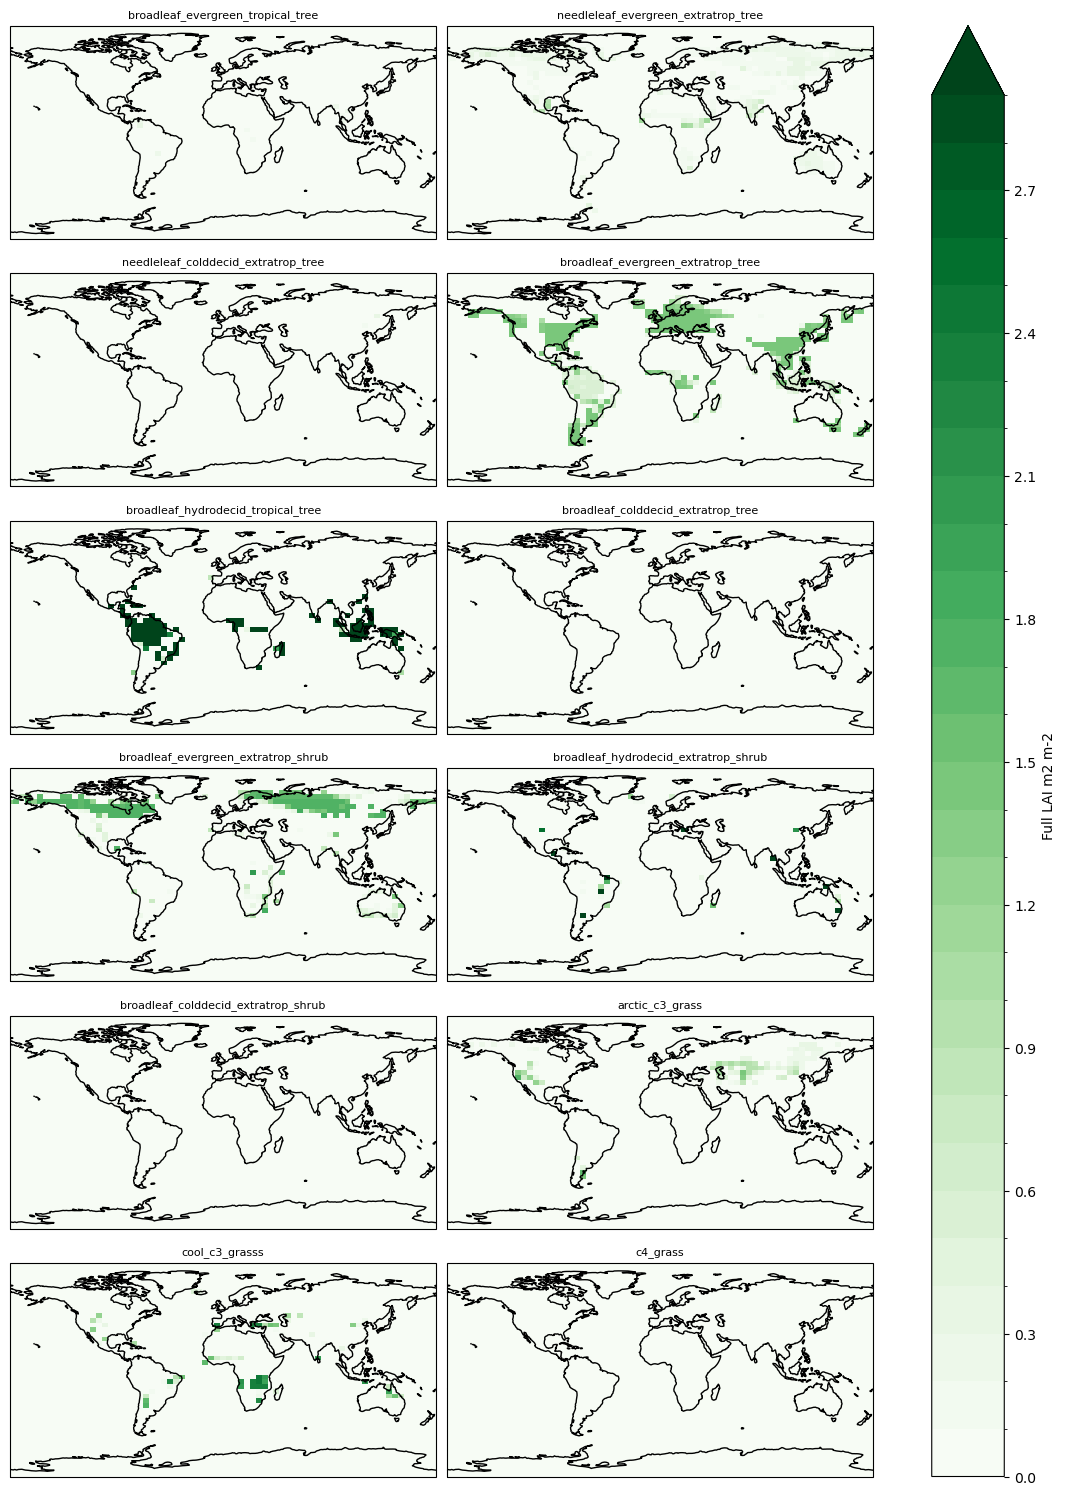

In [19]:
# szpf to size by pft
lai_sz_by_pft = fa.scpf_to_scls_by_pft(fates_history_fin_full.FATES_LAI_CANOPY_SZPF, fates_history_fin_full)
# sum over sizes
lai_pft = lai_sz_by_pft.sum(dim='fates_levscls')
# last five years
lai_pft_tmean = lai_pft.isel(time=slice(tave_start_full,tave_stop_full)).mean(dim='time') 

g = lai_pft_tmean.plot(x="lon",y="lat",col="fates_levpft", col_wrap=2, 
           figsize=(12, 15),
      cbar_kwargs={"label": "Full LAI m2 m-2"},
      subplot_kws={"projection":ccrs.PlateCarree(),"facecolor":"white"},
          levels = np.arange(0,3,0.1), cmap='Greens',
            facecolor="white")
for i, ax in enumerate(g.axes.flat):
    ax.set_title(pfts[i], fontsize=8)
[ax.coastlines() for ax in g.axes.flatten()]

;

## Biomass 

### Total biomass
See ILAMB for comparison with data: 
https://compy-dtn.pnl.gov/need138/rcmodes_default_JH_params/EcosystemandCarbonCycle/Biomass/ESACCI/ESACCI.html

#### Notes: 
NB: these runs did not contain land use or land cover change!

- SP mode: low bias in most of the globe. 

- Fixed biogeography no comp: low bias in boreal regions and small region in central Africa, high biass most of the rest of the globe. 

- Fixed biogeography comp: low bias in boreal regions and parts of Africa and Amazon. High bias in central America, SE S. America, Madagascar and SE Asia. 

- Full: V. high bias in PNW, E. USA, Central America, SE S. America, Europe, SE Asia. 

### Biomass by PFT

PFT distributions in full FATES are biased with too much broadleaf evergreen extra tropical trees and broadleaf hydro deciduous tropical trees in the tropics and temperate zone. 

''

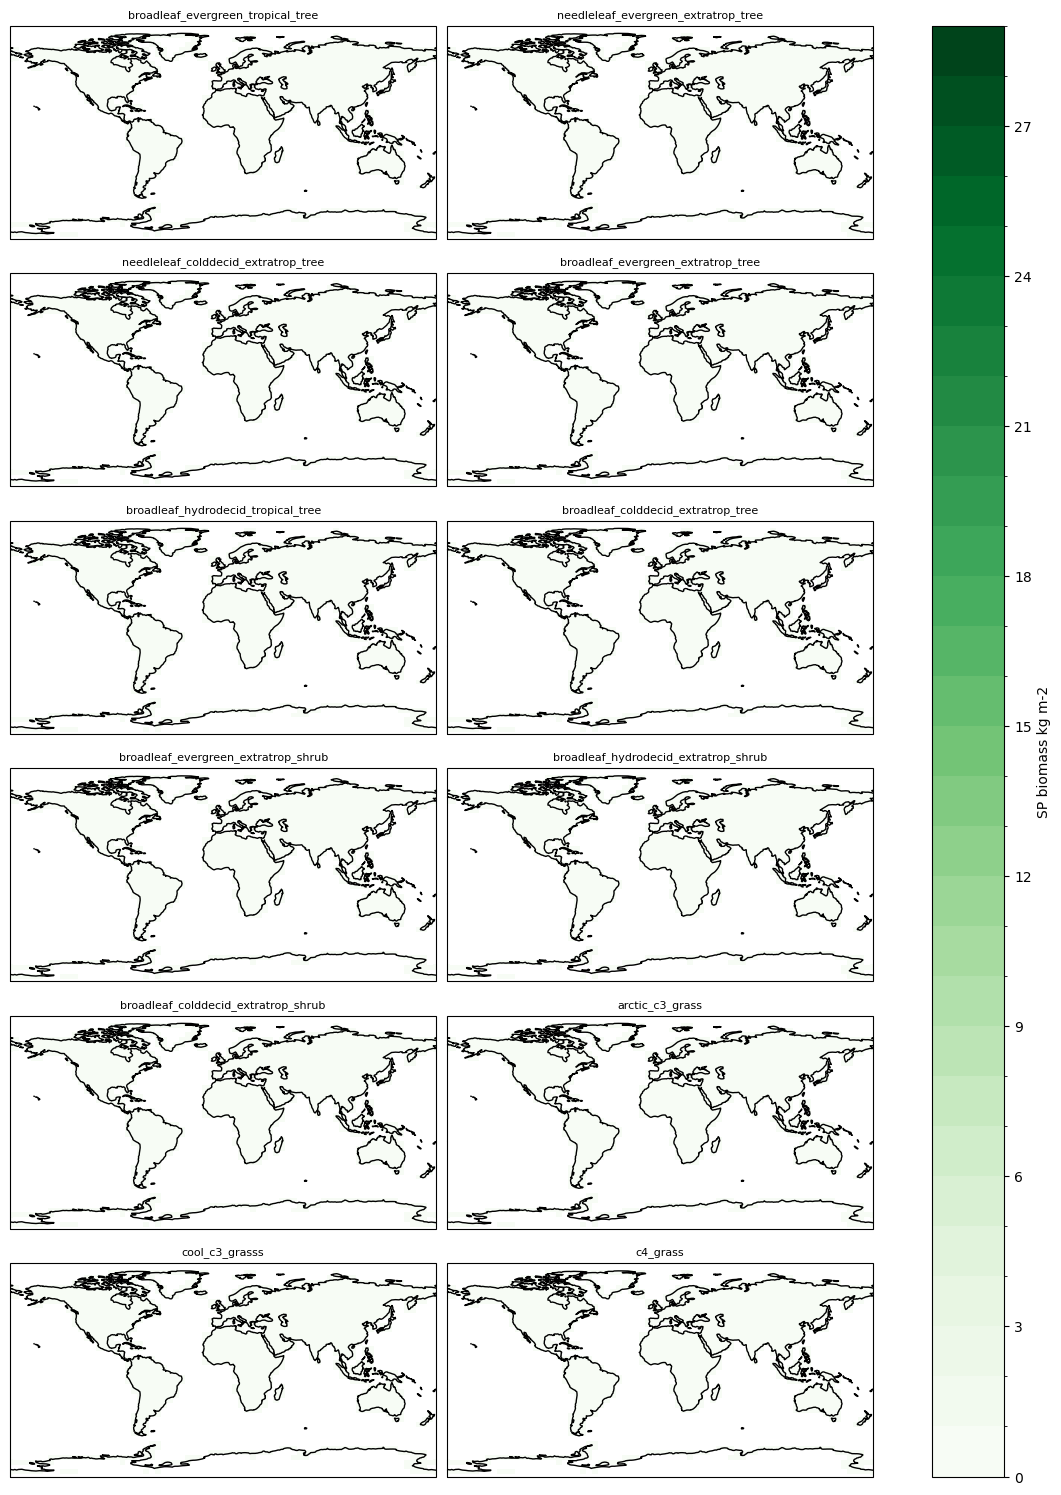

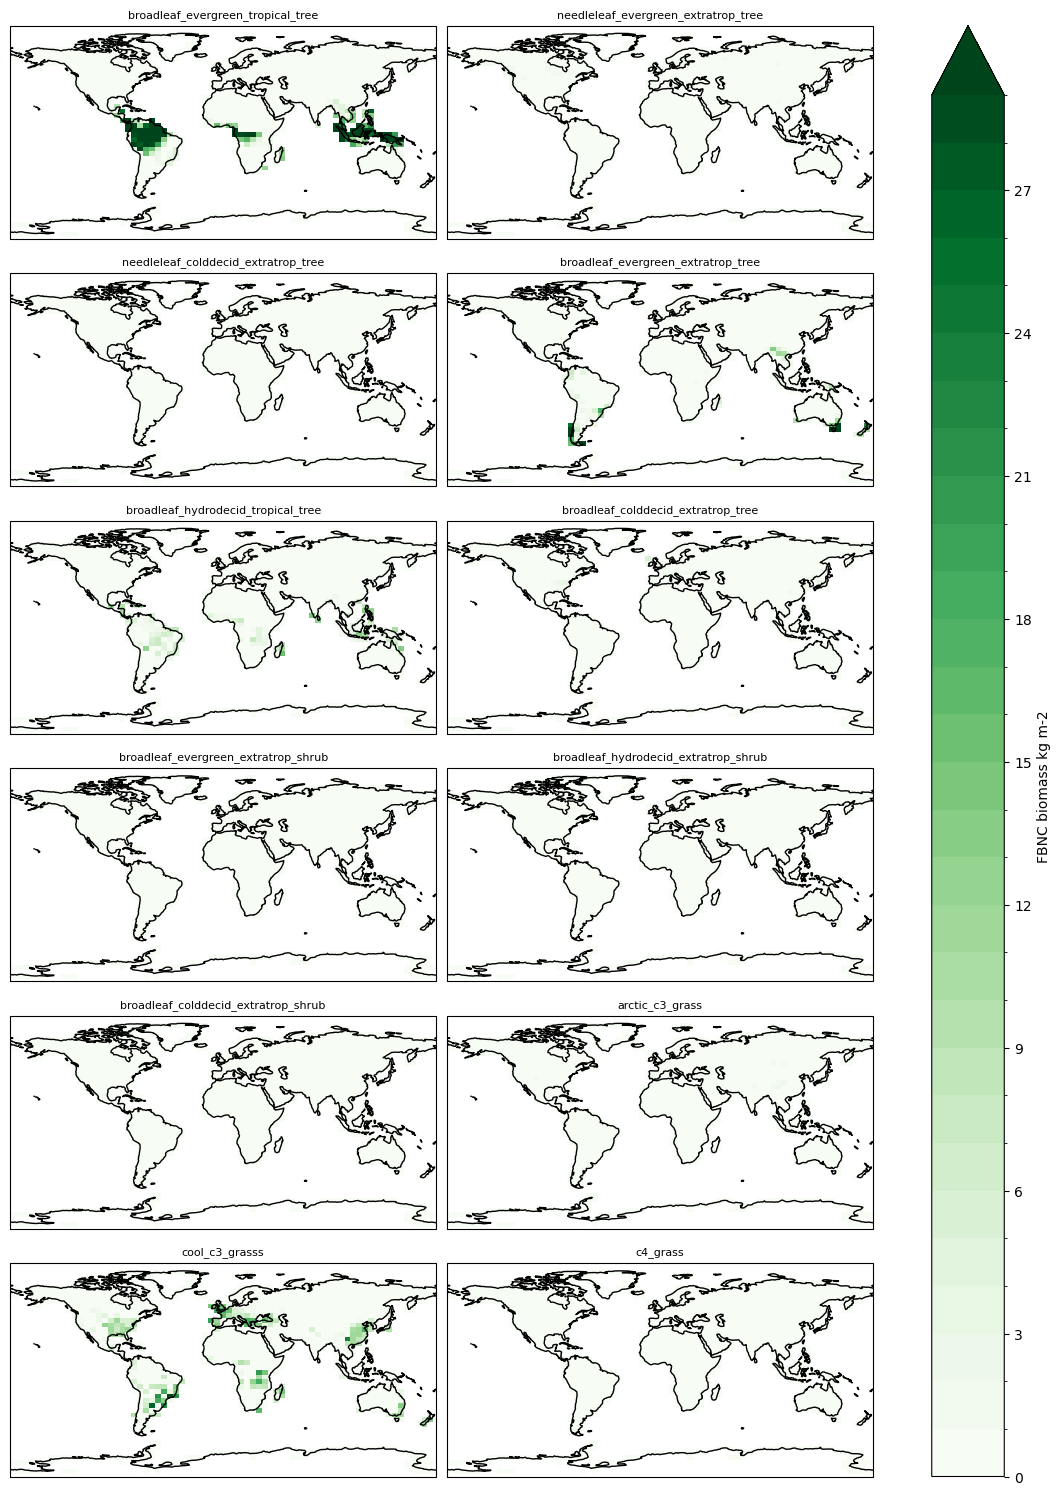

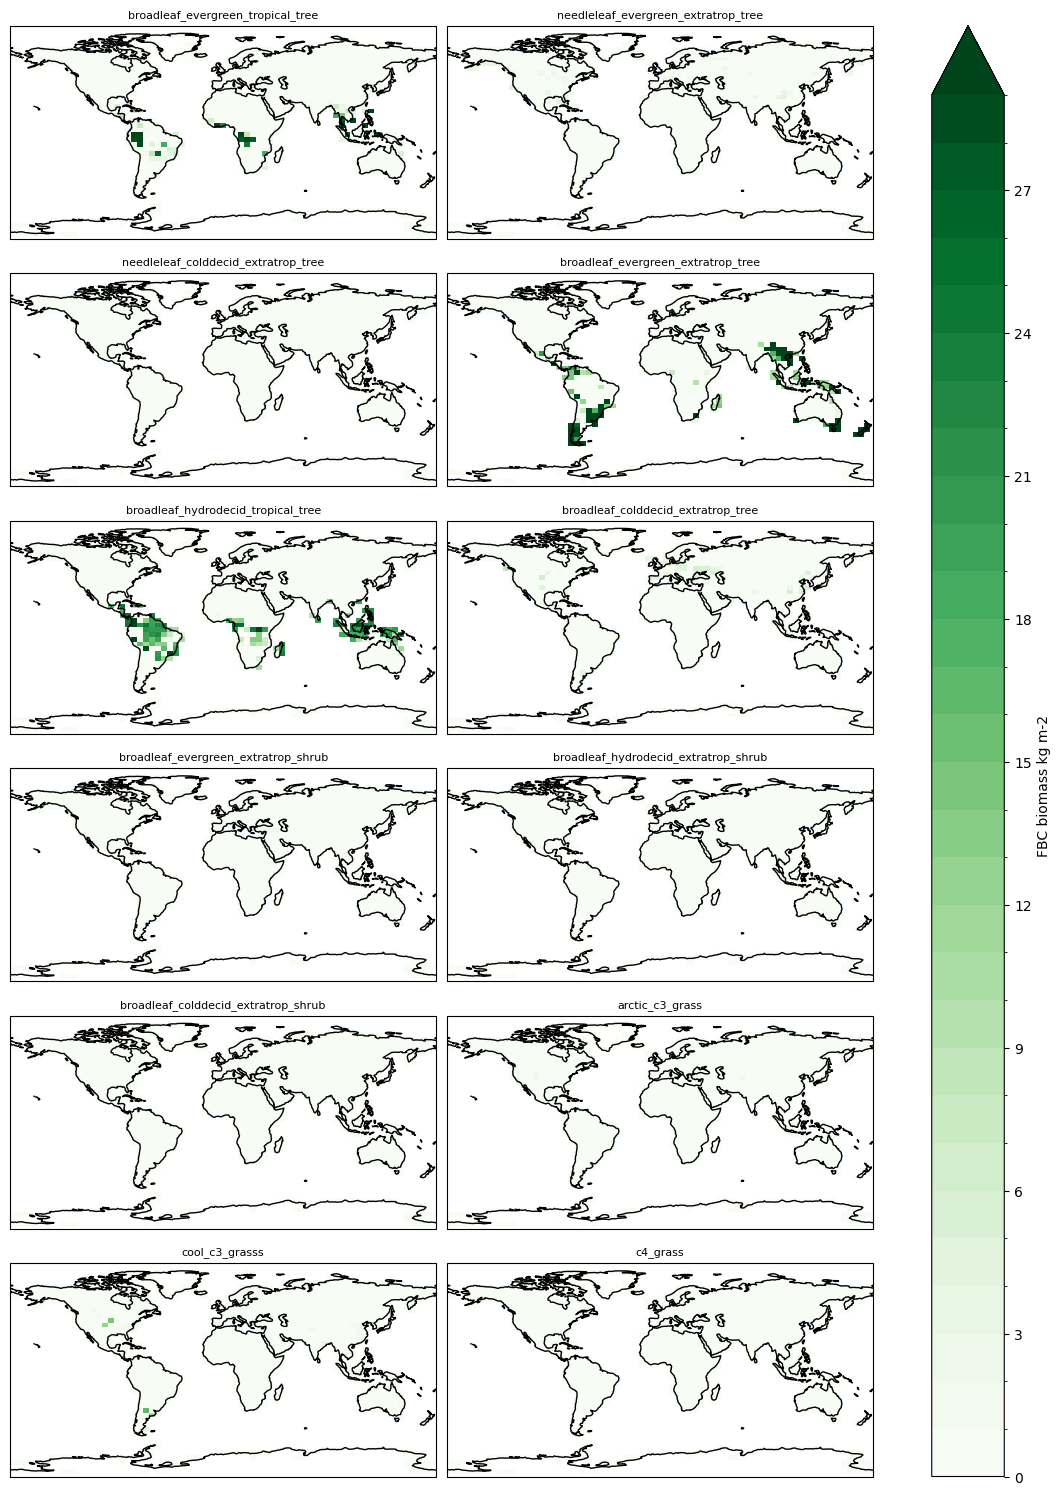

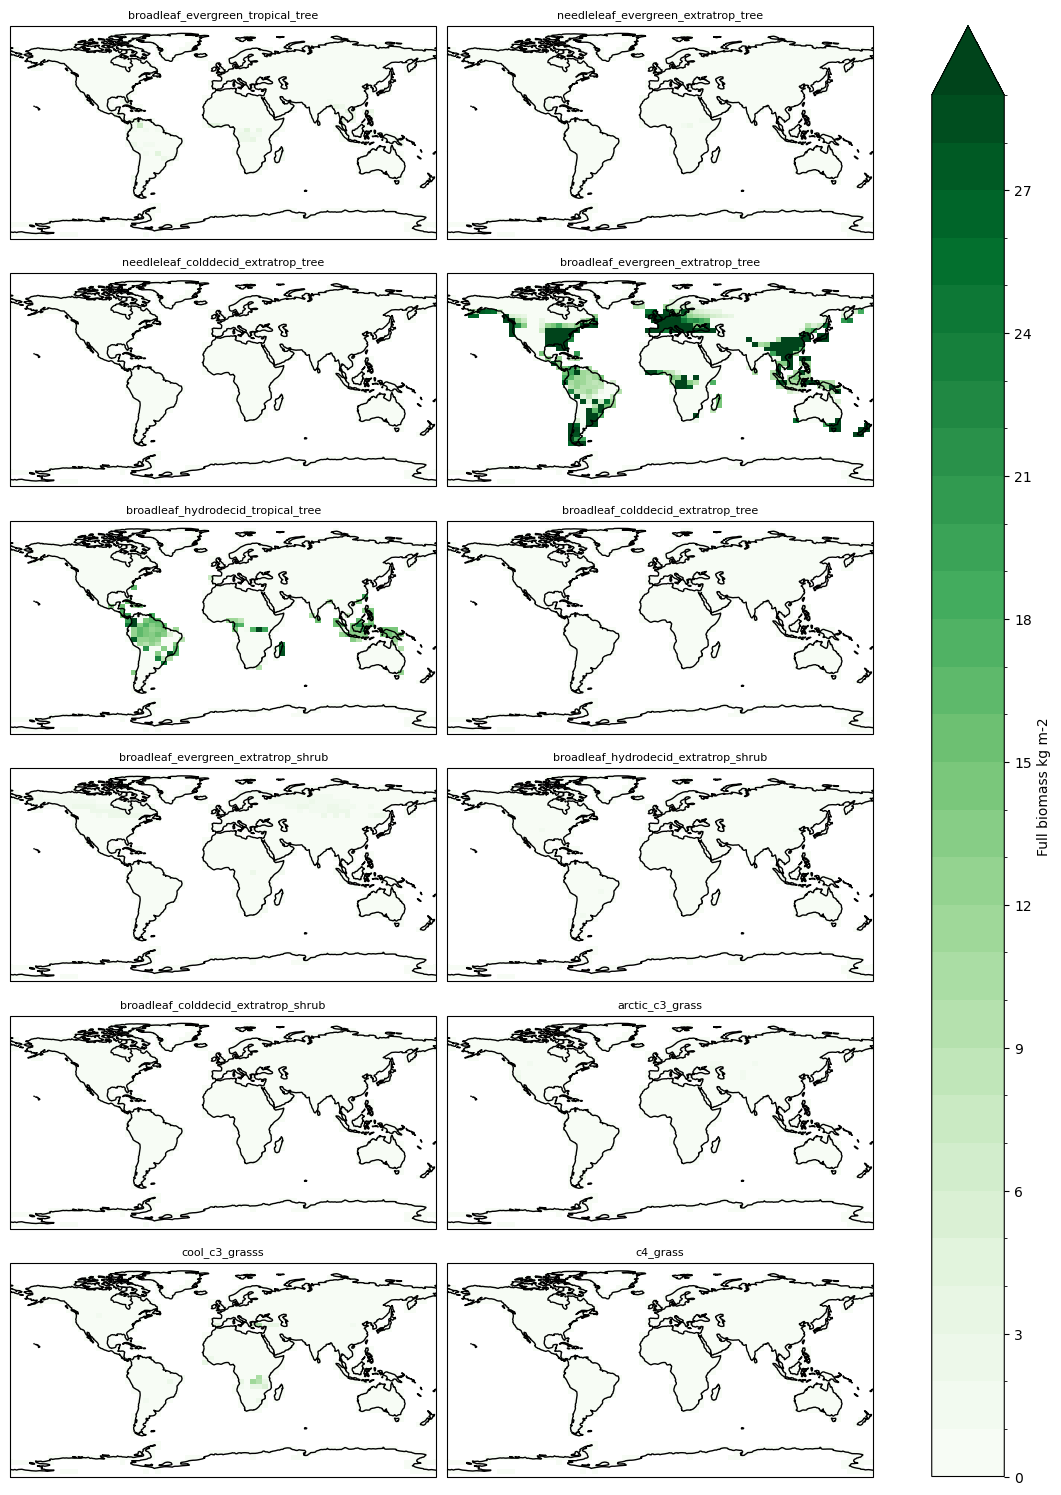

In [21]:
sp = fates_history_fin_sp.FATES_VEGC_PF.isel(time=slice(tave_start_sp,tave_stop_sp)).mean(dim='time') 
g = sp.plot(x="lon",y="lat",col="fates_levpft", col_wrap=2, 
           figsize=(12, 15),
      cbar_kwargs={"label": "SP biomass kg m-2"},
      subplot_kws={"projection":ccrs.PlateCarree(),"facecolor":"white"},
          levels = np.arange(0,30,1), cmap='Greens',
            facecolor="white")
for i, ax in enumerate(g.axes.flat):
    ax.set_title(pfts[i], fontsize=8)
[ax.coastlines() for ax in g.axes.flatten()]

fbnc = fates_history_fin_fbnc.FATES_VEGC_PF.isel(time=slice(tave_start_fbnc,tave_stop_fbnc)).mean(dim='time') 
g = fbnc.plot(x="lon",y="lat",col="fates_levpft", col_wrap=2, 
           figsize=(12, 15),
      cbar_kwargs={"label": "FBNC biomass kg m-2"},
      subplot_kws={"projection":ccrs.PlateCarree(),"facecolor":"white"},
          levels = np.arange(0,30,1), cmap='Greens',
            facecolor="white")
for i, ax in enumerate(g.axes.flat):
    ax.set_title(pfts[i], fontsize=8)
[ax.coastlines() for ax in g.axes.flatten()]

fbc = fates_history_fin_fbc.FATES_VEGC_PF.isel(time=slice(tave_start_fbc,tave_stop_fbc)).mean(dim='time') 
g = fbc.plot(x="lon",y="lat",col="fates_levpft", col_wrap=2, 
           figsize=(12, 15),
      cbar_kwargs={"label": "FBC biomass kg m-2"},
      subplot_kws={"projection":ccrs.PlateCarree(),"facecolor":"white"},
          levels = np.arange(0,30,1), cmap='Greens',
            facecolor="white")
for i, ax in enumerate(g.axes.flat):
    ax.set_title(pfts[i], fontsize=8)
[ax.coastlines() for ax in g.axes.flatten()]

full = fates_history_fin_full.FATES_VEGC_PF.isel(time=slice(tave_start_full,tave_stop_full)).mean(dim='time') 
g = full.plot(x="lon",y="lat",col="fates_levpft", col_wrap=2, 
           figsize=(12, 15),
      cbar_kwargs={"label": "Full biomass kg m-2"},
      subplot_kws={"projection":ccrs.PlateCarree(),"facecolor":"white"},
          levels = np.arange(0,30,1), cmap='Greens',
            facecolor="white")
for i, ax in enumerate(g.axes.flat):
    ax.set_title(pfts[i], fontsize=8)
[ax.coastlines() for ax in g.axes.flatten()]

;

## Net Ecosystem Exchange

### NEE total 
For comparison with observations see ILAMB: 
https://compy-dtn.pnl.gov/need138/rcmodes_default_JH_params/EcosystemandCarbonCycle/NetEcosystemExchange/FLUXNET2015/FLUXNET2015.html

Notes:
- SP mode: high bias in most parts of the globe.
- Fixed biogeography no comp: high biomass in most parts of the globe. 
- Fixed biogeography comp: high biomass in most parts of the globe. 
- Full: high biomass in most parts of the globe. 

## Evapotranspiration

### Evapotranspiration total 
For comparison with observations see ILAMB: 
https://compy-dtn.pnl.gov/need138/rcmodes_default_JH_params/HydrologyCycle/Evapotranspiration/GLEAMv3.3a/GLEAMv3.3a.html?model=fixedbiogcomp

#### Notes:
- SP mode: low bias in much of the boreal zone, central Africa and Amazon. High bias in the remainder of S. America and parts of Africa and India. 
- Fixed biogeography no comp: similar to spmode. 
- Fixed biogeography comp: similar to spmode. 
- Full: similar to spmode. 

## Albedo 

### Albedo total 
For comparison with observations see ILAMB: 
https://compy-dtn.pnl.gov/need138/rcmodes_default_JH_params/RadiationandEnergyCycle/Albedo/CERES/CERES.html

#### Notes:

- SP mode: high bias across most of the globe. 
- Fixed biogeography no comp: slightly lower bias than sp mode in Africa. 
- Fixed biogeography comp: very high bias in S. America and most of the globe. N. America is quite good, low bias in Canada. 
- Full: high bias in most of the world. Low bias in N. Canada. 
